## Preamble

In [42]:
pip install sympy
pip install numpy
pip install pandas
pip install matplotlib

SyntaxError: invalid syntax (2405723092.py, line 1)

In [1]:
import numpy as np
from sympy import symbols, Eq
from sympy.interactive import printing
from sympy import pi
import pandas as pd
import matplotlib.pyplot as plt

## 02.12 Offline Kalibrierung

### Import data

In [2]:
# File import
with open('testdata.txt', 'r') as file:
    lines = file.readlines()[0:]

data = []
for line in lines:
    # Split
    parts = line.split()
    
    # Bye first column
    row = parts[2:]
    data.append(row)

# Column names
columns = [
     "Frequency", "Re(1ω)", "Im(1ω)", "Re(3ω)", "Im(3ω)", "Phase(1ω)", "Phase(3ω)",
    "Vref", "Current", "Re(ΔT)", "Δ[Re(ΔT)]", "Im(ΔT)", "Δ[Im(ΔT)]", "Power", "Temperature"
]

# DataFrame
df = pd.DataFrame(data, columns=columns)
print(df)

  Frequency             Re(1ω)              Im(1ω)             Re(3ω)  \
0    10.000  0.128168420396861  -0.000000000000004  0.001201514320429   
1    14.592  0.128929742917524   0.000000000000003  0.001113346330013   
2    21.294  0.129612913502709   0.000000000000004  0.001029477080947   
3    31.072  0.130401750345415   0.000000000000010  0.000950022228322   
4    45.342  0.130923792752236   0.000000000000005  0.000871625278675   
5    66.164  0.131501573258185  -0.000000000000018  0.000796766542770   
6    96.549  0.131855597866627   0.000000000000010  0.000723240231149   
7   140.887  0.132121031585632  -0.000000000000012  0.000650013159849   
8   205.587  0.132404500544174   0.000000000000039  0.000577341312168   
9   300.000  0.132491124737582   0.000000000000149  0.000507469009460   

               Im(3ω)           Phase(1ω)            Phase(3ω)      Vref  \
0  -0.000279804426717  -0.000000000001870  -13.109195621472953  0.099384   
1  -0.000277384384230   0.000000000001249  -

In [3]:
df

,Frequency,Re(1ω),Im(1ω),Re(3ω),Im(3ω),Phase(1ω),Phase(3ω),Vref,Current,Re(ΔT),Δ[Re(ΔT)],Im(ΔT),Δ[Im(ΔT)],Power,Temperature
0,10.000,0.128168420396861,-0.000000000000004,0.001201514320429,-0.000279804426717,-0.000000000001870,-13.109195621472953,0.099384,0.009938,1.889020,0.000000,-0.439908,0.002101,0.001274,-145.23
1,14.592,0.128929742917524,0.000000000000003,0.001113346330013,-0.000277384384230,0.000000000001249,-13.990114035348618,0.099090,0.009909,1.755598,0.000000,-0.437398,0.002089,0.001278,-144.34
2,21.294,0.129612913502709,0.000000000000004,0.001029477080947,-0.000275458954937,0.000000000001636,-14.979819379861420,0.098844,0.009884,1.627391,0.000000,-0.435444,0.002080,0.001281,-143.54
3,31.072,0.130401750345415,0.000000000000010,0.000950022228322,-0.000273876427473,0.000000000004540,-16.081437325952354,0.098694,0.009869,1.504062,0.000000,-0.433597,0.002071,0.001287,-142.76
4,45.342,0.130923792752236,0.000000000000005,0.000871625278675,-0.000271773873834,0.000000000002236,-17.317545171358915,0.098499,0.009850,1.382681,0.000000,-0.431122,0.002059,0.001290,-142.14
5,66.164,0.131501573258185,-0.000000000000018,0.000796766542770,-0.000270357226748,-0.000000000007992,-18.742999108909647,0.098368,0.009837,1.265610,0.000000,-0.429444,0.002051,0.001294,-141.55
6,96.549,0.131855597866627,0.000000000000010,0.000723240231149,-0.000267692321052,0.000000000004210,-20.310984168378134,0.098208,0.009821,1.150694,0.000000,-0.425905,0.002035,0.001295,-141.09
7,140.887,0.132121031585632,-0.000000000000012,0.000650013159849,-0.000264381749779,-0.000000000005122,-22.133193942631220,0.098012,0.009801,1.036261,0.000000,-0.421481,0.002014,0.001295,-140.67
8,205.587,0.132404500544174,0.000000000000039,0.000577341312168,-0.000260149654714,0.000000000017062,-24.256299136321825,0.097772,0.009777,0.922663,0.000000,-0.415751,0.001987,0.001295,-140.19
9,300.000,0.132491124737582,0.000000000000149,0.000507469009460,-0.000254816879729,0.000000000064306,-26.662732169375502,0.097530,0.009753,0.813010,0.000000,-0.408239,0.001951,0.001292,-139.86


### Korrelationsgleichung fuer die Kalibrierung

In [4]:
# LaTeX rendering
printing.init_printing()

In [5]:
# Define variables
dRdT = symbols('dR/dT')
dVdf= symbols('dV3w/dlnf')
dR,dT,L,lambda_sub,lambda_air,f,P,I = symbols('dR dT L lambda_sub lambda_air f P I')


In [6]:
equation = Eq(dRdT, ((-4*pi)/(P*I))*(lambda_air+lambda_sub)*(dVdf))

In [7]:
display(equation)

        -4⋅π⋅dV3w/dlnf⋅(λₐᵢᵣ + λ_sub) 
dR/dT = ──────────────────────────────
                     I⋅P              

### dR/dT Berechnung (unter Cryo)

#### Substrate thermal conductivity

#### Slope dRe(V3w)/dln(f)

In [26]:
v3w=df['Re(3ω)'].values
v3w

array(['0.001201514320429', '0.001113346330013', '0.001029477080947',
       '0.000950022228322', '0.000871625278675', '0.000796766542770',
       '0.000723240231149', '0.000650013159849', '0.000577341312168',
       '0.000507469009460'], dtype=object)

In [29]:
v3w=df['Re(3ω)'].values
f=df['Frequency'].values
v3w=v3w.astype(float)
f=f.astype(float)
lnf=np.log(f)

In [30]:
print(v3w)
print(f)
print(lnf)

[0.00120151 0.00111335 0.00102948 0.00095002 0.00087163 0.00079677
 0.00072324 0.00065001 0.00057734 0.00050747]
[ 10.     14.592  21.294  31.072  45.342  66.164  96.549 140.887 205.587
 300.   ]
[2.30258509 2.68047343 3.05842534 3.43630709 3.81423376 4.19213651
 4.57005065 4.94795815 5.3258693  5.70378247]


Slope: -0.00020288505883722638, Intercept: 0.0016542674015800065


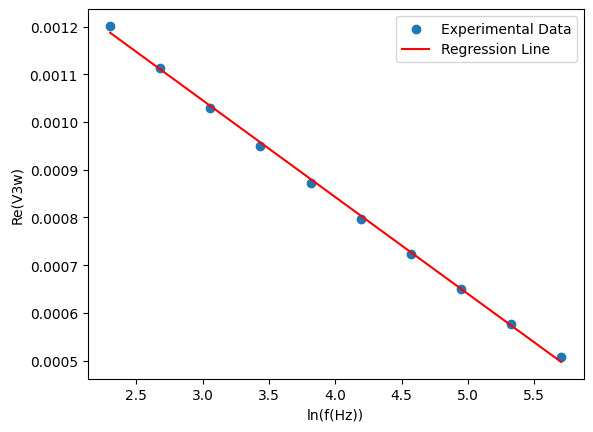

In [33]:
X=lnf
Y=v3w
# Perform linear regression using NumPy's polyfit
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

# Predict values
Y_pred = slope * X + intercept

# Plot the data and regression line
plt.scatter(X, Y, label='Experimental Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('ln(f(Hz))')
plt.ylabel('Re(V3w)')
plt.legend()
plt.show()

In [34]:
slope